In [35]:
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
%matplotlib inline

In [38]:
df = pd.read_csv('kyphosis.csv')

In [39]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


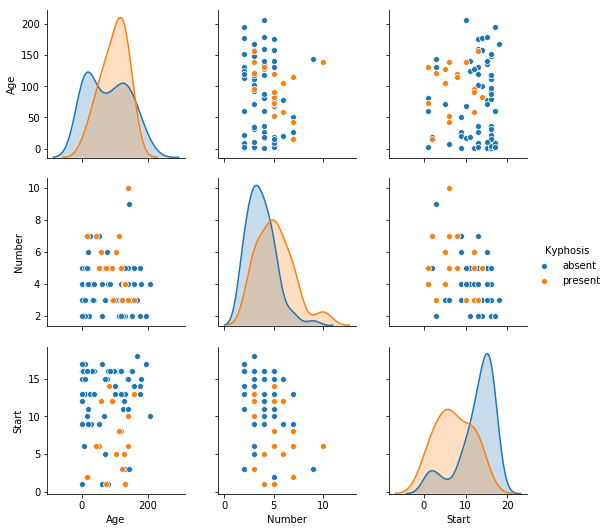

In [45]:
sns.pairplot(df, hue='Kyphosis')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
predictions = dtree.predict(X_test)

In [52]:
predictions

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [53]:
np.array(y_test)

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

   micro avg       0.76      0.76      0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [56]:
print(confusion_matrix(y_test, predictions))

[[17  2]
 [ 4  2]]


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=200)

In [59]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
rfc_predict = rfc.predict(X_test)

In [61]:
rfc_predict

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [62]:
np.array(y_test)

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent'], dtype=object)

In [63]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

   micro avg       0.76      0.76      0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



In [64]:
print(confusion_matrix(y_test, rfc_predict))

[[18  1]
 [ 5  1]]


In [65]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [66]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [68]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [69]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

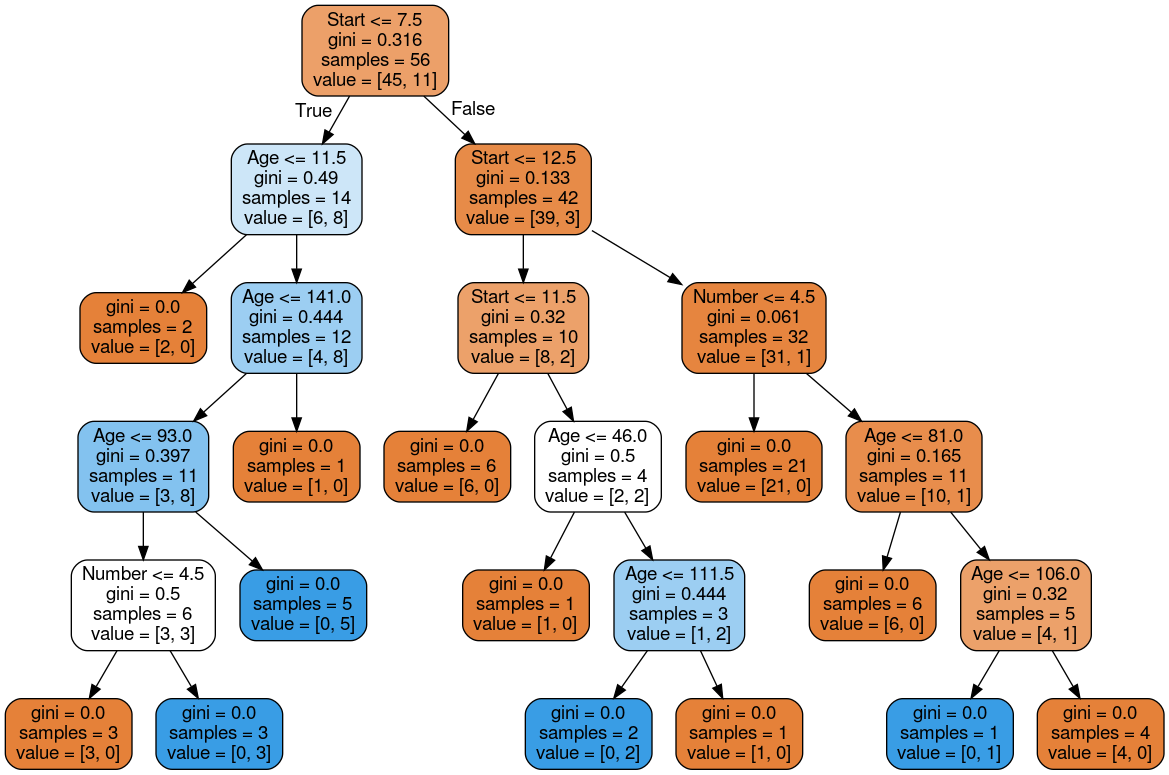

In [75]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())